

# **Data Preprocessing:**
**Importing libraries and reading dataset from drive**

In [ ]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Full_Training_set='/content/drive/MyDrive/NSL-KDD/KDDTrain+.txt'
Test_set='/content/drive/MyDrive/NSL-KDD/KDDTest+.txt'

df = pd.read_csv(Full_Training_set)
test_df =pd.read_csv(Test_set)

In [ ]:
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
test_df.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
# adding the columns labels

columns = (['duration','protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns=columns
test_df.columns =columns

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
df.shape

(125972, 43)

<Axes: >

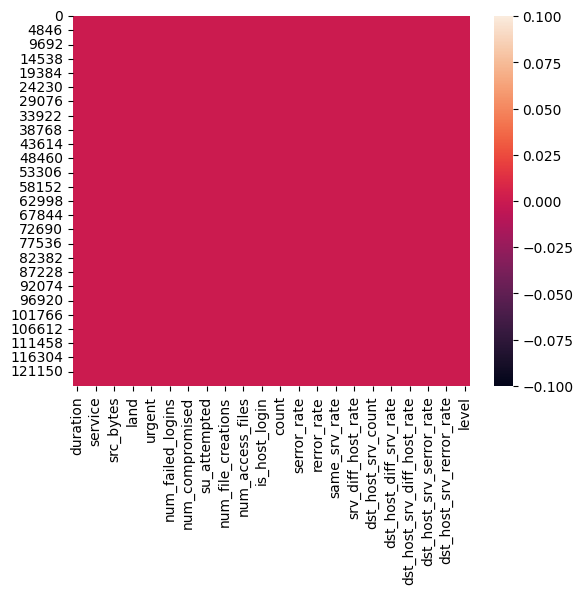

In [ ]:
sns.heatmap(df.isnull())
#To Check for any NULL values in train data.

<Axes: >

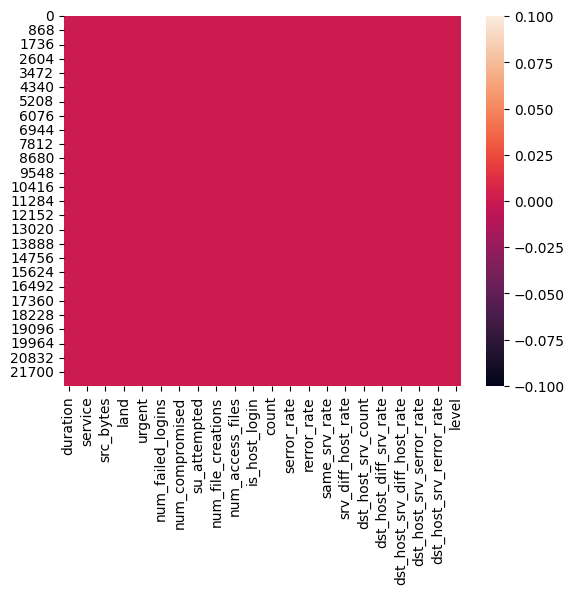

In [ ]:
sns.heatmap(test_df.isnull())
#To Check for any NULL values in test data.

**We can clearly see there and no missing or null values in our data set so we can procede for data transformations.**

# **Data transformations**
*italicized text*
We'll start by adding a column that encodes '*normal*' values as *0* and any other value as *1*. We will use this as our *classifier* for a simple binary model that idenfities any attack.


In [ ]:
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

df.head()

#now attack_flag column is added.

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


**We'll classify each of the attacks according to attack type for a more granular prediction model.**



*  ***Denial of Service attacks*** : [apache2,
back,
land,
neptune,
mailbomb,
pod,
processtable,
smurf,
teardrop,
udpstorm,
worm]
*  ***Probe attacks*** : [
ipsweep,
mscan,
nmap,
portsweep,
saint,
satan]
*   ***Privilege escalation attacks*** : [buffer_overflow,
loadmdoule,
perl,
ps,
rootkit,
sqlattack,
xterm]
* ***Remote access attacks*** : [
ftp_write,
guess_passwd,
http_tunnel,
imap,
multihop,
named,
phf,
sendmail,
snmpgetattack,
snmpguess,
spy,
warezclient,
warezmaster,
xclock,
xsnoop]







In [ ]:
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        attack_type = 1
    elif attack in probe_attacks:
        attack_type = 2
    elif attack in privilege_attacks:
        attack_type = 3
    elif attack in access_attacks:
        attack_type = 4
    else:
        attack_type = 0

    return attack_type

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# view the result
df.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1,1
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,1,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,1,1
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,1,1
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,1,1
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1,1


#***Data profiling***

 First is a simple table of attack by protocol. In network traffic analysis protocol is a simple tool to create some initial buckets to categorize our data. 'normal' is left in the set at this point as a benchmark.

In [ ]:
# use a crosstab to get attack vs protocol
attack_vs_protocol = pd.crosstab(df.attack, df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


**Now some Pie Charts for Visualization to see how things are distributed among the data set(IN TERMS OF PROTOCOLS).**


<Axes: ylabel='protocol_type'>

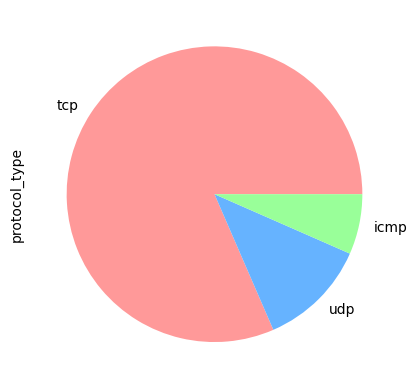

In [ ]:
# Network Protocols Visualization.
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'] #for changing the color we defined colour by our self.
df['protocol_type'].value_counts().plot(kind="pie",colors=colors)

In [ ]:
  # Function for drawing Pie charts in terms of network protcols.
def Draw_piechatrs(data_list,labels):
    list_length = len(data_list)

    # setup for mapping colors
    color_list = sns.color_palette("bright")
    color_cycle = itertools.cycle(color_list)
    cdict = {}

    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)

    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list):

        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)

        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                          colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges,data_set.index,title="Flags",loc="center left",bbox_to_anchor=(1, 0, 1, 1))
        # set the title
        axs[count].set_title(labels[count])

    return axs

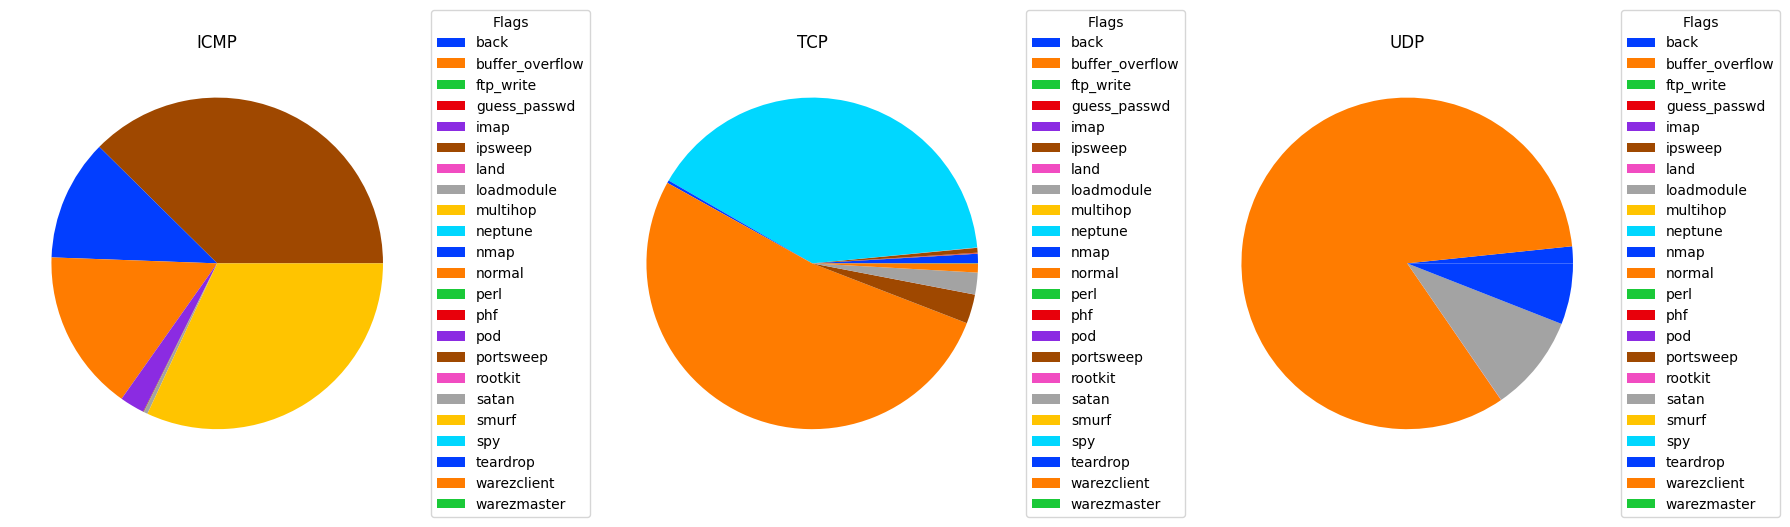

In [ ]:
# get each protocol seperately
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

# createing the piecharts
Draw_piechatrs([icmp_attacks, tcp_attacks, udp_attacks],['ICMP','TCP','UDP'])
plt.show()

# **Data Correlation** –
 **Find the highly correlated variables using heatmap and ignore them for analysis.**

In [ ]:
df.corr()

<ipython-input-153-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag,attack_map
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064219,0.042679,...,0.254195,0.228737,-0.026670,-0.064949,-0.064361,0.173815,0.199023,-0.156310,0.048785,0.125509
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.022592,0.005921,0.012928
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.018076,0.004118,0.008457
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.037038,0.007191,0.002678
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072419,-0.001044,...,0.059796,0.037177,-0.016252,-0.051917,-0.055918,0.028890,-0.033682,-0.157130,0.095905,0.051587
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.016411,-0.002787,0.005222
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002013,...,-0.012293,-0.034536,-0.024715,-0.058223,-0.058215,-0.030555,-0.031670,-0.160013,-0.013084,0.103132
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.073178,-0.003755,0.035192
logged_in,-0.064219,-0.003353,-0.002894,-0.011402,-0.072419,0.007299,0.116435,-0.006439,1.000000,0.014413,...,-0.256067,-0.160994,-0.055955,-0.491484,-0.493270,-0.275974,-0.272809,0.269820,-0.690181,-0.541081
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002013,0.019085,0.014413,1.000000,...,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219,-0.006101,-0.010198,-0.008741


<ipython-input-154-9361a0352de2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN
<ipython-input-154-9361a0352de2>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  test_df=test_df.dropna('columns')
<ipython-input-154-9361a0352de2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

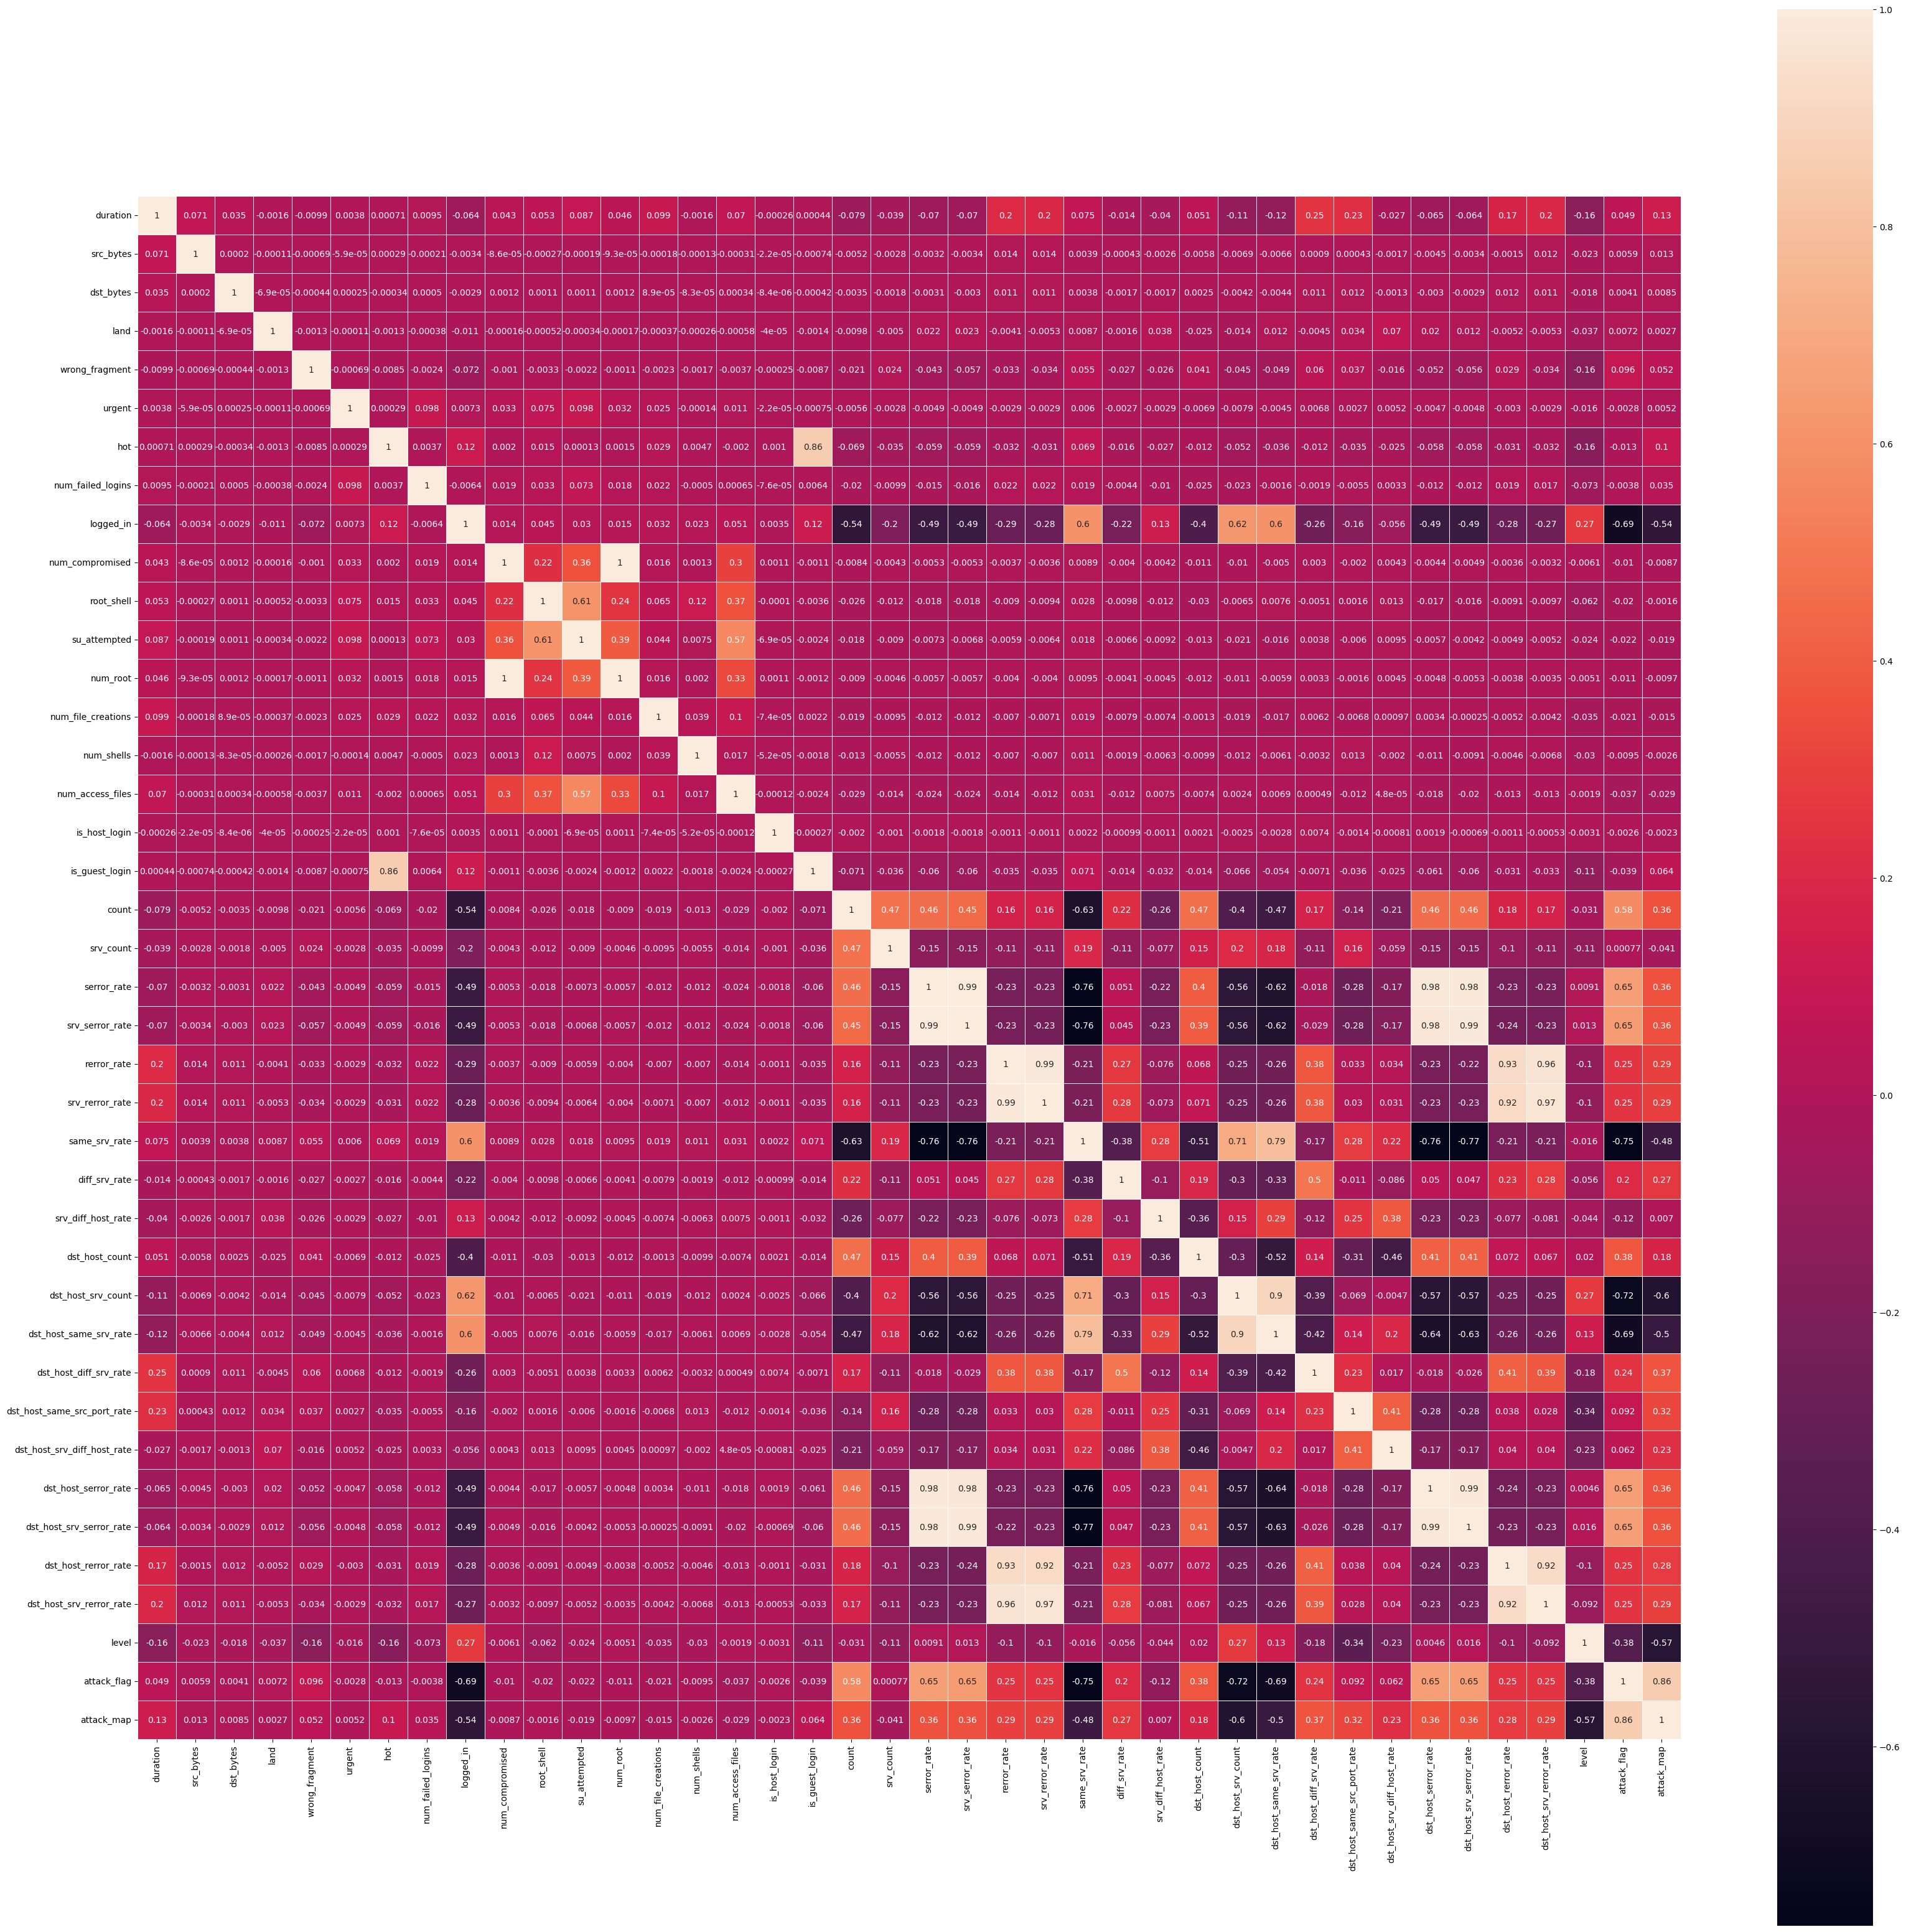

In [ ]:
df = df.dropna('columns')# drop columns with NaN
test_df=test_df.dropna('columns')
df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values
plt.subplots(figsize=(40, 40))
corr = df.corr()
sns.heatmap(corr,annot=True,linewidths=.5,square=True)


*   Correlation coefficients whose magnitude are between 0.9 and 1.0 indicate
variables which can be considered very highly correlated.
*   Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated.

*   Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.
*   Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation.

In [ ]:
#Droping one of the two features from each very highly correlated pair using the drop() function .

df.drop('num_root', axis = 1, inplace = True)
df.drop('srv_serror_rate', axis = 1, inplace = True)
df.drop('srv_rerror_rate', axis = 1, inplace = True)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

test_df.drop('num_root', axis = 1, inplace = True)
test_df.drop('srv_serror_rate', axis = 1, inplace = True)
test_df.drop('srv_rerror_rate', axis = 1, inplace = True)
test_df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)
test_df.drop('dst_host_serror_rate', axis = 1, inplace = True)
test_df.drop('dst_host_rerror_rate', axis = 1, inplace = True)
test_df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)
test_df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)
test_df.drop('num_outbound_cmds', axis = 1, inplace = True)

In [ ]:
df.shape

(125972, 36)

In [ ]:
test_df.shape

(22543, 36)

# **Data Mapping**

In [ ]:
#protocol_type feature mapping
protocol_map = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(protocol_map)
test_df['protocol_type'] = test_df['protocol_type'].map(protocol_map)

In [ ]:
#flag feature mapping
flag_map = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(flag_map)
test_df['flag'] = test_df['flag'].map(flag_map)

In [ ]:
#Remove irrelevant features such as ‘service’ before modelling
df.drop('service', axis = 1, inplace = True)
test_df.drop('service', axis = 1, inplace = True)

# **Data Modelling**
**Importing libraries and splitting the dataset**




In [ ]:
X_train = df.drop('attack', axis=1)
y_train = df['attack']
X_test = test_df.drop('attack', axis=1)
y_test = test_df['attack']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train_encoded = X_train.apply(le.fit_transform)
X_test_encoded = X_test.apply(le.fit_transform)

# **Implementation of Logistic Regression**

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
clfl = LogisticRegression()
start_time = time.time()
clfl.fit(X_train_encoded,y_train)
end_time = time.time()
et1=end_time-start_time
print("Training time: ",et1)

In [ ]:
start_time = time.time()
y_test_pred = clfl.predict(X_test_encoded)
end_time = time.time()
e1=end_time-start_time
print("Testing time: ",e1)

Testing time:  0.04902505874633789


In [ ]:
a = accuracy_score(y_test,y_test_pred)
print("Test score is:",a )

Test score is: 0.6760413432107528


# **Implementation of Gaussian Naive Bayes**


In [ ]:
##Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
clfg = GaussianNB()
start_time = time.time()
clfg.fit(X_train_encoded, y_train)
end_time = time.time()
et2=end_time-start_time
print("Training time: ",et2)

Training time:  1.5768539905548096


In [ ]:
start_time = time.time()
y_test_pred = clfg.predict(X_test_encoded)
end_time = time.time()
e2=end_time-start_time
print("Testing time: ",e2)

Testing time:  0.0806727409362793


In [ ]:
a2= accuracy_score(y_test,y_test_pred)
print("Test score is:",a2)

Test score is: 0.6742225968149759


# **Implementation of Decision Tree**

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(X_train_encoded, y_train.values.ravel())
end_time = time.time()
et3=end_time-start_time
print("Training time: ",et3)

Training time:  0.37174391746520996


In [ ]:
start_time = time.time()
y_test_pred = clfd.predict(X_test_encoded)
end_time = time.time()
e3=end_time-start_time
print("Testing time: ",e3)

Testing time:  0.010792732238769531


In [ ]:
a3=accuracy_score(y_test,y_test_pred)
print("Test score is:",a3)

Test score is: 0.7176063523044848


# **Implementation of Random Forest**



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clfr = RandomForestClassifier()
start_time = time.time()
clfr.fit(X_train_encoded, y_train)
end_time = time.time()
et4=end_time-start_time
print("Training time: ",et4)

Training time:  8.33590841293335


In [ ]:
start_time = time.time()
y_test_predrf = clfr.predict(X_test_encoded)
end_time = time.time()
e4=end_time-start_time
print("Testing time: ",e4)

Testing time:  0.4042491912841797


In [ ]:
a4=accuracy_score(y_test,y_test_predrf)
print("Test score is:",a4)

Test score is: 0.7353058599121679


#  **Implementation of Support Vector Classifier**



In [ ]:
#SVM
from sklearn.svm import SVC

In [ ]:
clfs = SVC(gamma = 'scale')
start_time = time.time()
clfs.fit(X_train_encoded, y_train)
end_time = time.time()
et5=end_time-start_time;
print("Training time: ",et5)

Training time:  684.2121727466583


In [ ]:
start_time = time.time()
y_test_pred = clfs.predict(X_test_encoded)
end_time = time.time()
e5=end_time-start_time
print("Testing time: ",e5)

Testing time:  47.18726134300232


In [ ]:
a5=accuracy_score(y_test,y_test_pred)
print("Test score is:",a5)

Test score is: 0.6989752916648183


# **Testing accuracy of each model.**

<Axes: >

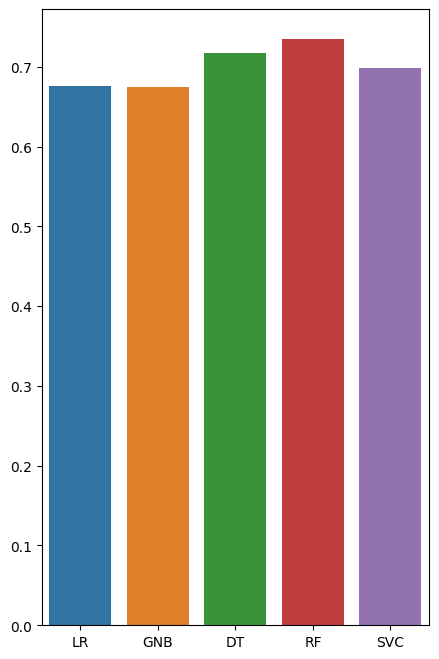

In [ ]:
models = ['LR', 'GNB', 'DT', 'RF', 'SVC']
values = [a,a2,a3,a4,a5]
f = plt.figure(figsize =(5, 8))
sns.barplot(x=models,y=values)

# **Training time of each model.**

<Axes: >

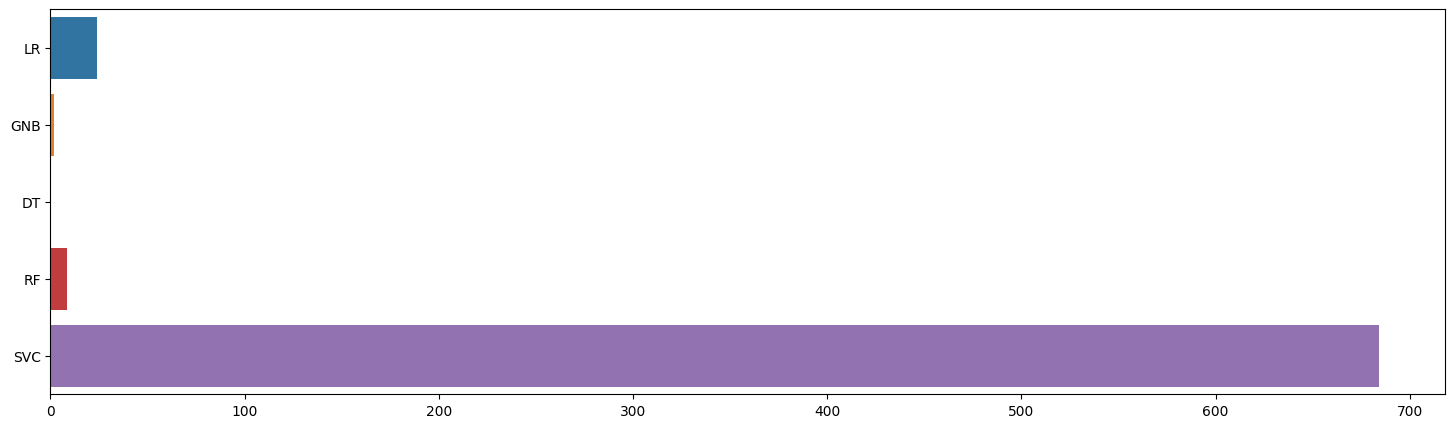

In [ ]:
models = ['LR', 'GNB', 'DT', 'RF', 'SVC']
values = [et1,et2,et3,et4,et5]
f = plt.figure(figsize =(18,5))
sns.barplot(x=values,y=models)

# **Testing time of each model.**

<Axes: >

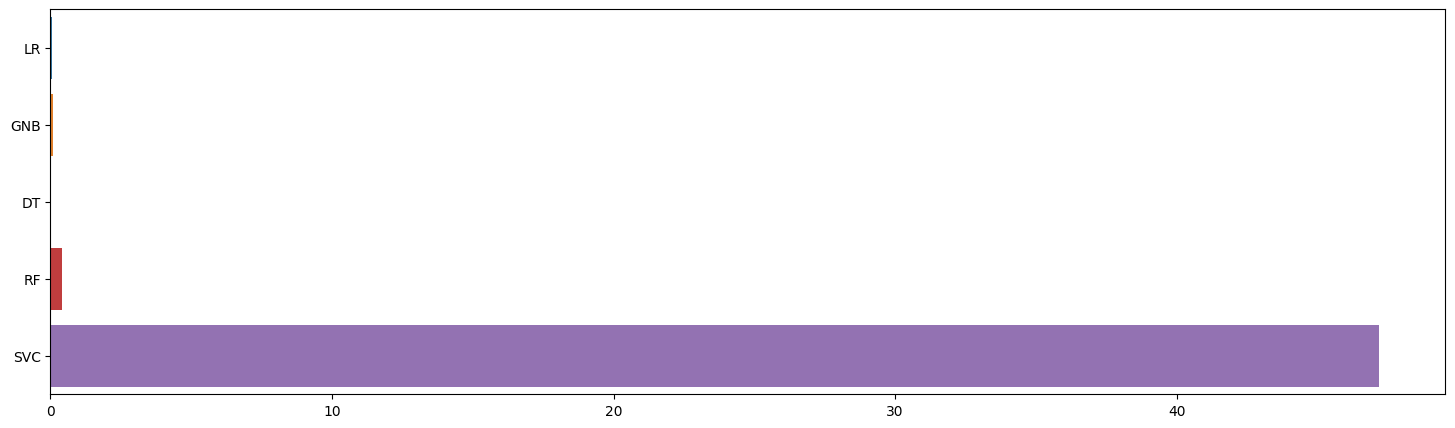

In [ ]:
models = ['LR', 'GNB', 'DT', 'RF', 'SVC']
values = [e1,e2,e3,e4,e5]
f = plt.figure(figsize =(18,5))
sns.barplot(x=values,y=models)

## **Conclusion:**
**The above analysis of different models states that the Random Forest model best fits our data considering both accuracy and time complexity.**
*   Acurracy 0f = 0.7346404648893227(73.4%)
*   Training Time =8.33590841293335
*   Test Time = 0.4042491912841797

